<a href="https://colab.research.google.com/github/katduecker/dnn_osci/blob/main/Thesis_Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# clone git repo
!git clone https://github.com/katduecker/dnn_osci
%cd dnn_osci
%cd aet_pytorch/

In [ ]:
# 1) Characterise a single-neuron dynamical system


# one neuron: describe dynamical system as a function of input
# show that it is easily entrained
# pulses build uo earlier for neurons with strong inputs

# "population rate model"

# H~R system
# justify max(Z) scaling with homeostatic processes


# timing/params: Abbot & DAyan
# timing calcium dependent potassium channels

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [125]:
# helper functions


# sigmoid activation with option to stretch (increase slope) and shift
def sigmoid(z,sig_param):

    _slope,_bias = sig_param

    return 1.0/(1.0+np.exp(-_slope*(z+_bias)))



# forward dynamics/Euler's method
def euler_dyn(Z,t_,params_,alpha_params_):

    # inputs:
        # Z: activation
        # t_: time vector
        # params_: parameters for dynamics
        # alpha_params: alpha frequency, amplitude, and phase shift

    # discretization & dynamics parameters
    tau_h,tau_R,c,S,h_start,R_start = params_


    # alpha frequency & amplitude
    _af,_aa,_ap = alpha_params_


    # initialize empty matrices
    dt = np.diff(t_)[0]
    dh1dt = (np.zeros((len(t_)+1,)))
    dR1dt = (np.zeros((len(t_)+1,)))
    dR1dt[0] = R_start;
    dZdt = (np.zeros((len(t_)+1,)))

    # alpha inhibition
    alpha_inh1 = _aa*np.sin(2*np.pi*_af*t_+_ap)+_aa

    for _it,t in enumerate(t_):

        # pre-activation
        dZdt[_it+1] = (Z - alpha_inh1[_it] +  dh1dt[_it] - dR1dt[_it] )/S

        # dynamics hidden layer1
        dh1dt[_it+1] = dh1dt[_it] + dt/tau_h * (-dh1dt[_it] + sigmoid(dZdt[_it+1],[2,-2.5]))

        # adaptation term 1
        dR1dt[_it+1] = dR1dt[_it] + dt/tau_R * (-dR1dt[_it] + c*dZdt[_it])



    return dZdt, dh1dt, dR1dt

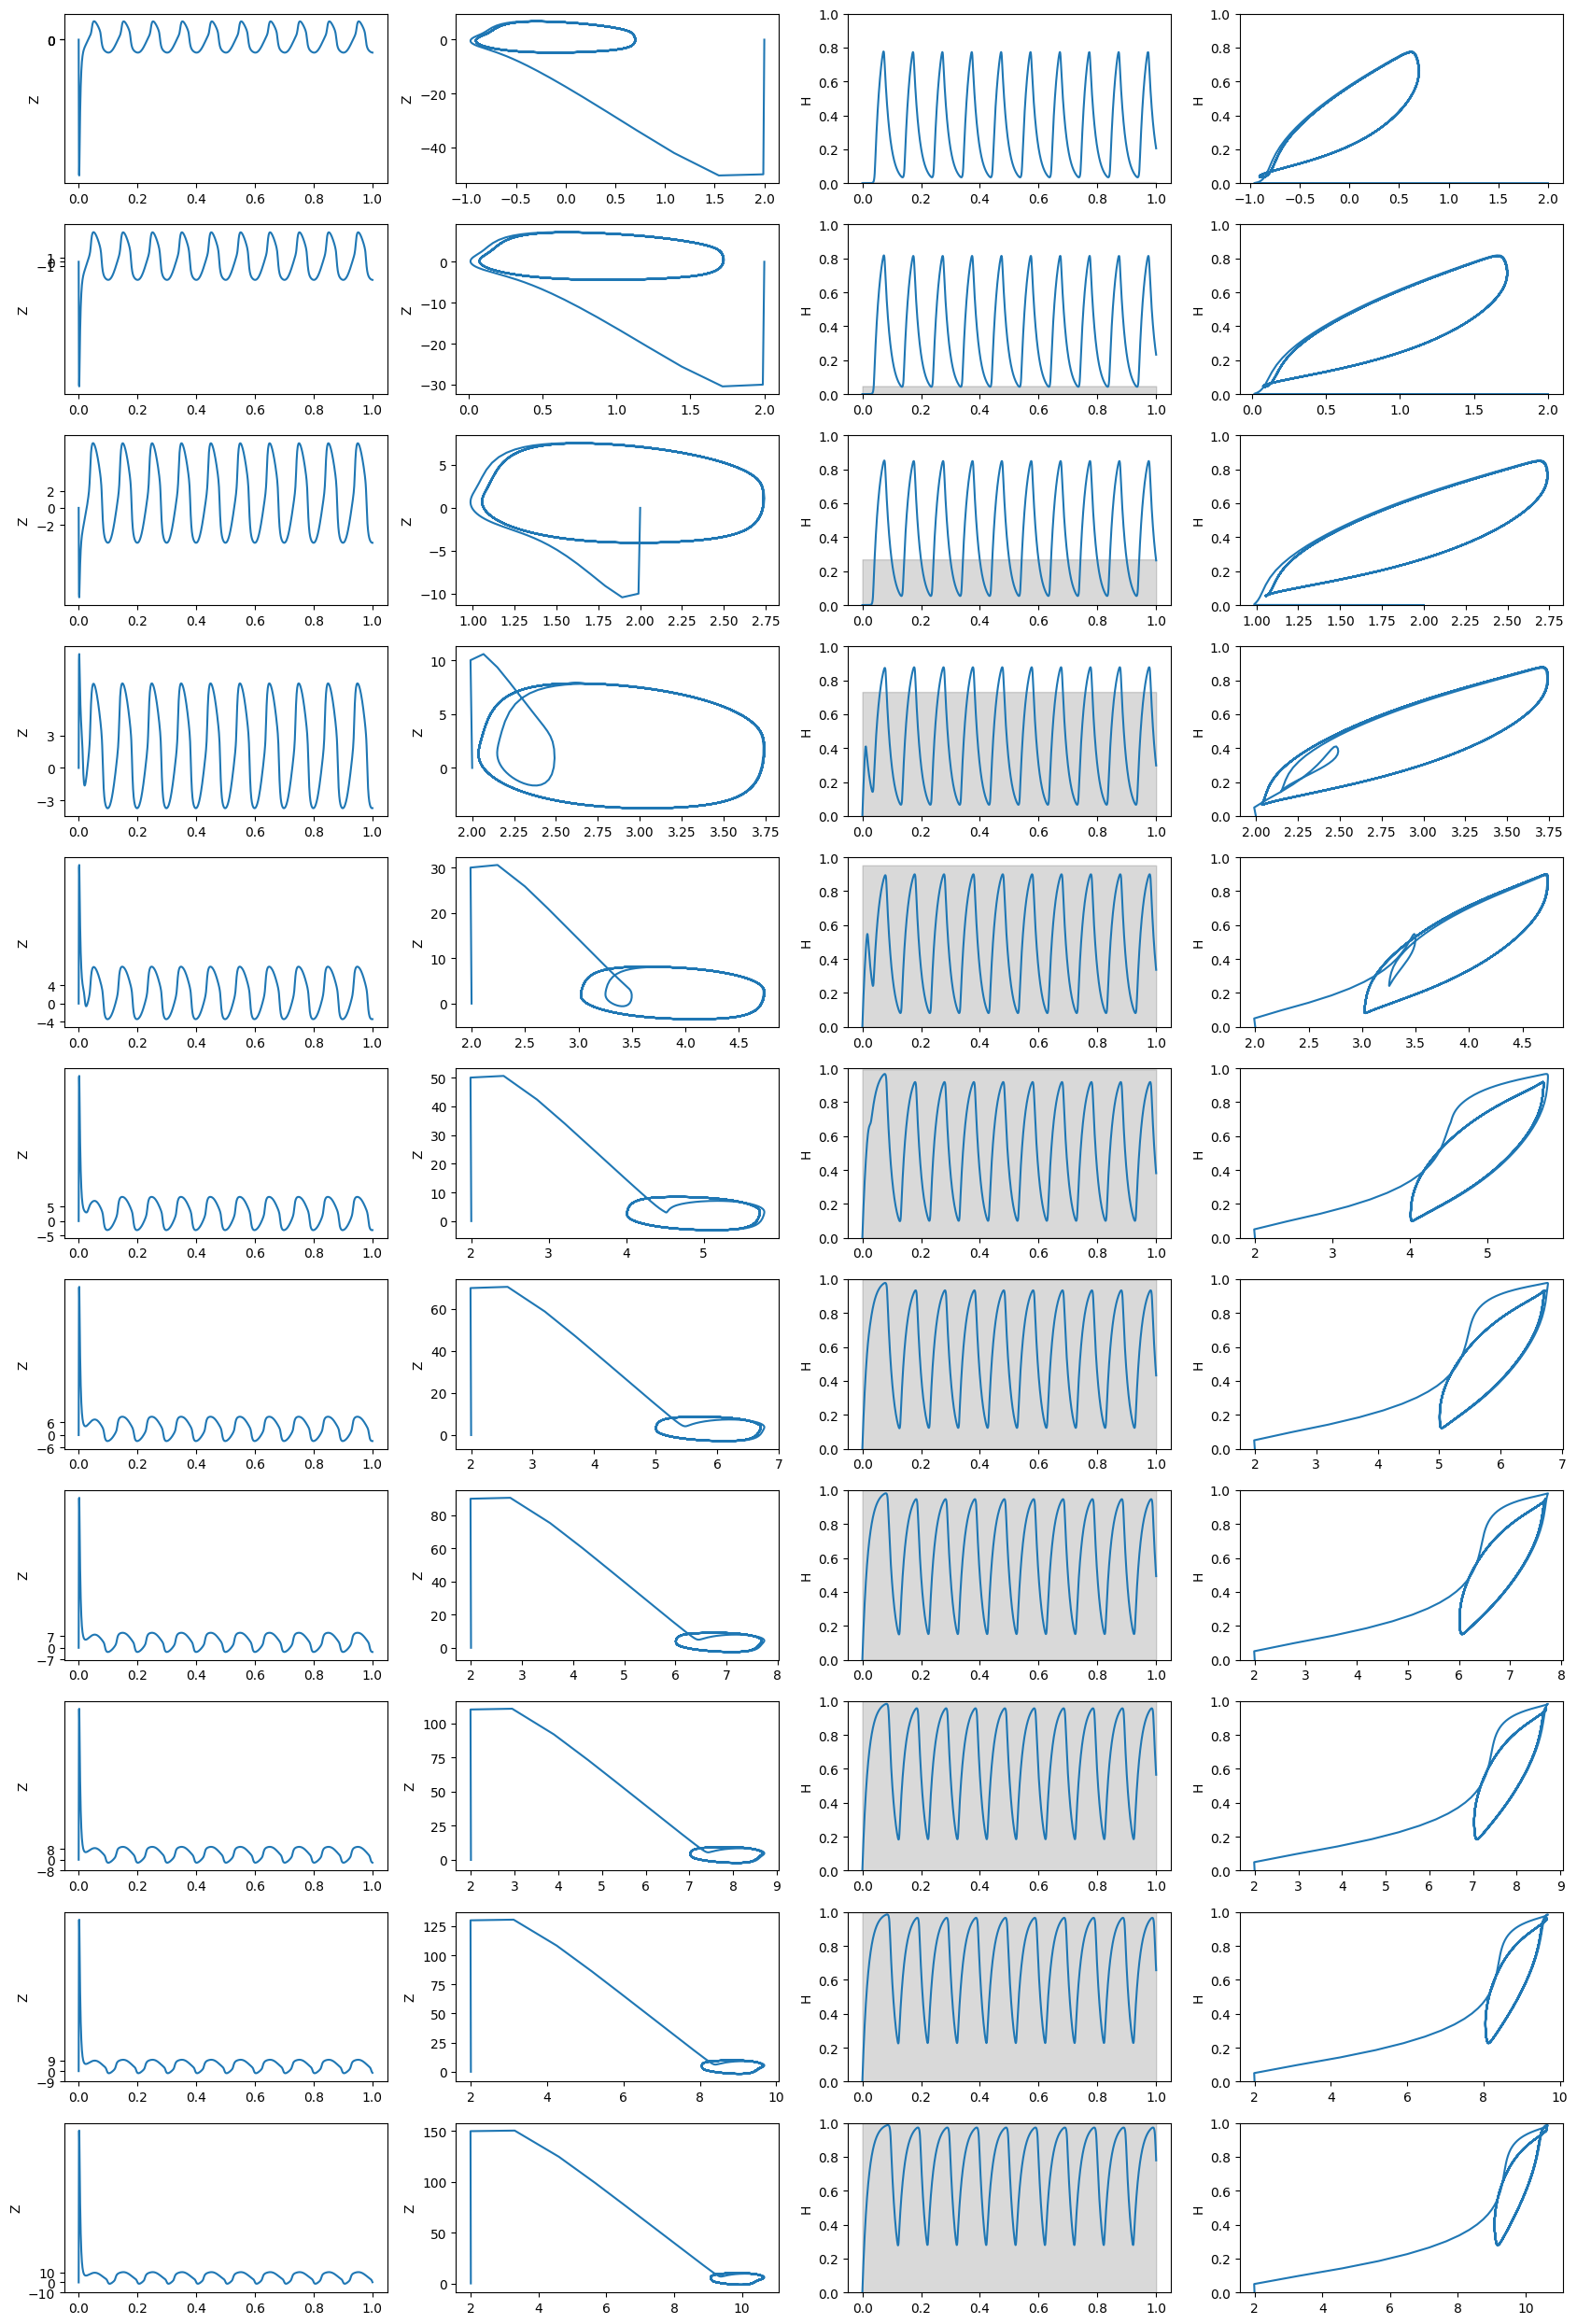

In [127]:
# parameters endogenous dynamics
tau_h = 0.02
tau_R = 0.2
S = .05
h_start = 0
R_start = 2
c = 1.75
params = [tau_h,tau_R,c,S,h_start,R_start]

timevec = np.linspace(0,1,1000)
t = 0

# parameters alpha

afreq = 10
aamp = 0.5
aph = 0

alpha_params = [afreq,aamp,aph]

# inputs
Z_inp = np.arange(0,20,1)
plt.rcParams["figure.figsize"] = (17,25)

maxZ = 11
fig, axs = plt.subplots(maxZ,4)

for i,Z in enumerate(Z_inp[:maxZ]):

  Zt,Ht,Rt = euler_dyn(Z,timevec,params,alpha_params)
  axs[i,0].plot(timevec[t:],Zt[t:-1])
  axs[i,0].set_yticks((-Z,0,Z))
  axs[i,0].set_ylabel('Z')


  axs[i,1].plot(Rt[t:],Zt[t:])
  axs[i,1].set_ylabel('Z')

  axs[i,2].plot(timevec[t:],Ht[t:-1])
  axs[i,2].fill_between(timevec[t:], np.tile(0,timevec[t:].shape[0]), np.tile(sigmoid(Z,[2,-2.5]),timevec[t:].shape[0]), alpha=0.15, color=[0, 0, 0])
  axs[i,2].set_ylabel('H')

  axs[i,2].set_ylim(0,1)
  axs[i,3].plot(Rt[t:],Ht[t:])
  axs[i,3].set_ylim(0,1)
  axs[i,3].set_ylabel('H')



  if i == Z_inp.shape[0]-1:
    axs[i,0].set_xlabel('time (s)')
    axs[i,2].set_xlabel('time (s)')
    axs[i,1].set_xlabel('R')
    axs[i,3].set_xlabel('R')


fig.tight_layout()


# by using Z to grow R, everything goes well for Z's up to a value of 6
# if Z > 6 -> R -> 1 and Z/H don't oscillate



In [55]:
Zt_ = np.zeros((14,timevec.shape[0]+1))
Rt_ = np.zeros((14,timevec.shape[0]+1))
for i,Z in enumerate(Z_inp[6:]):
  Zt_[i,:],Rt_[i,:],_ = euler_dyn(Z,timevec,params,alpha_params)



In [116]:
# forward dynamics/Euler's method
def euler_dyn(Z,t_,params_,alpha_params_):

    # inputs:
        # Z: activation
        # t_: time vector
        # params_: parameters for dynamics
        # alpha_params: alpha frequency, amplitude, and phase shift

    # discretization & dynamics parameters
    tau_h,tau_R,c,S,h_start,R_start = params_


    # alpha frequency & amplitude
    _af,_aa,_ap = alpha_params_


    # initialize empty matrices
    dt = np.diff(t_)[0]
    dh1dt = (np.zeros((len(t_)+1,)))
    dR1dt = (np.zeros((len(t_)+1,)))
    dR1dt[0] = R_start;
    dZdt = (np.zeros((len(t_)+1,)))

    # alpha inhibition
    alpha_inh1 = _aa*np.sin(2*np.pi*_af*t_+_ap)+_aa

    for _it,t in enumerate(t_):

        # pre-activation
        dZdt[_it+1] = (Z + dh1dt[_it] - dR1dt[_it] - alpha_inh1[_it])/S

        # dynamics hidden layer1
        dh1dt[_it+1] = dh1dt[_it] + dt/tau_h * (-dh1dt[_it] + sigmoid(dZdt[_it+1],[2,-2.5]))

        # adaptation term 1
        dR1dt[_it+1] = dR1dt[_it] + dt/tau_R * (-dR1dt[_it] + c*dh1dt[_it])



    return dZdt, dh1dt, dR1dt

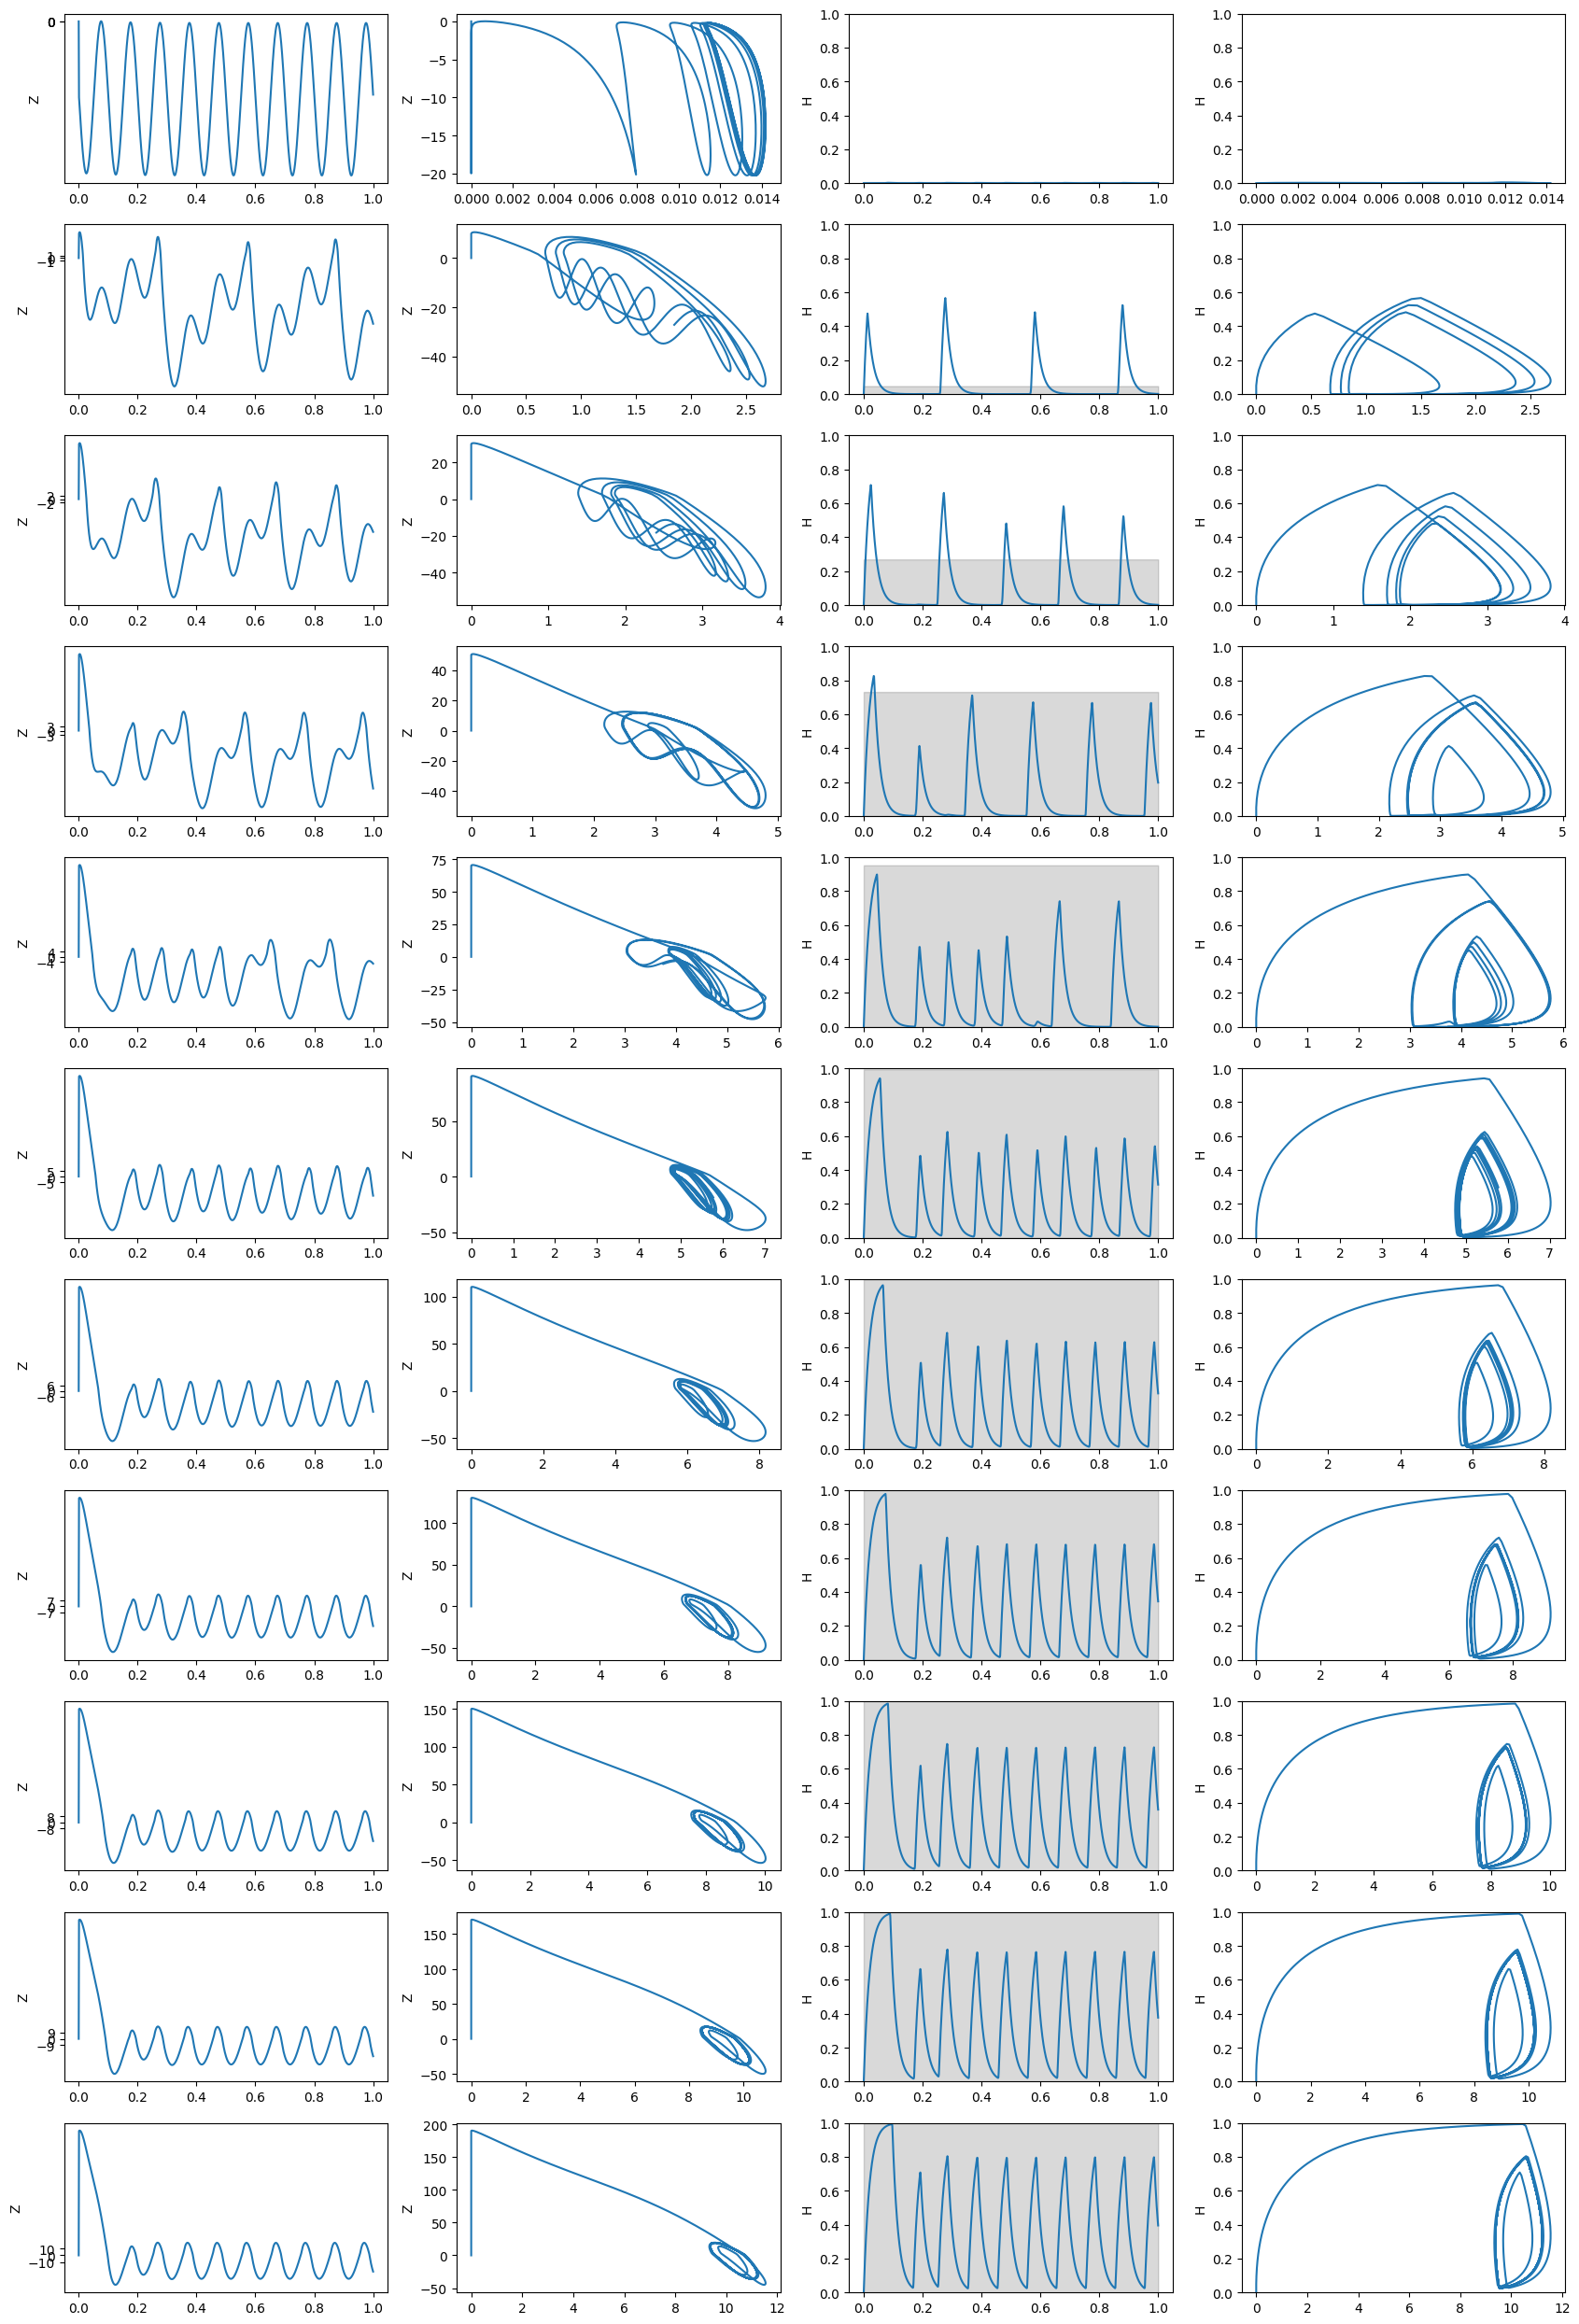

In [119]:
# parameters endogenous dynamics
tau_h = 0.02
tau_R = 0.2
S = .05
h_start = 0
R_start = 0
c = 1.75

timevec = np.linspace(0,1,1000)
t = 0

# parameters alpha

afreq = 10
aamp = 0.5
aph = 0

alpha_params = [afreq,aamp,aph]

# inputs
Z_inp = np.arange(0,20,1)
c = np.max(Z_inp)*c
params = [tau_h,tau_R,c,S,h_start,R_start]

plt.rcParams["figure.figsize"] = (17,25)

maxZ = 11
fig, axs = plt.subplots(maxZ,4)

for i,Z in enumerate(Z_inp[:maxZ]):

  Zt,Ht,Rt = euler_dyn(Z,timevec,params,alpha_params)
  axs[i,0].plot(timevec[t:],Zt[t:-1])
  axs[i,0].set_yticks((-Z,0,Z))
  axs[i,0].set_ylabel('Z')


  axs[i,1].plot(Rt[t:],Zt[t:])
  axs[i,1].set_ylabel('Z')

  axs[i,2].plot(timevec[t:],Ht[t:-1])
  axs[i,2].fill_between(timevec[t:], np.tile(0,timevec[t:].shape[0]), np.tile(sigmoid(Z,[2,-2.5]),timevec[t:].shape[0]), alpha=0.15, color=[0, 0, 0])
  axs[i,2].set_ylabel('H')

  axs[i,2].set_ylim(0,1)
  axs[i,3].plot(Rt[t:],Ht[t:])
  axs[i,3].set_ylim(0,1)
  axs[i,3].set_ylabel('H')



  if i == Z_inp.shape[0]-1:
    axs[i,0].set_xlabel('time (s)')
    axs[i,2].set_xlabel('time (s)')
    axs[i,1].set_xlabel('R')
    axs[i,3].set_xlabel('R')


fig.tight_layout()

In [ ]:
# 2) NN: 1 layer -> read out can be entrained to alpha

# With set bias and slope to ensure sparsity constraints & orthogonality, high activation
# Also show optimized sparsity constraints
# Show how alpha reflects a duty cycle

# temporal code

In [ ]:
# 3) 2 layer NN

# relationship between phase difference layer 1 & 2 and temporal codeness
# pipelining?